# Travaux dirigés/pratiques méthodes numériques et simulation
## Chapitre 1

In [1]:
from math import *
import numpy as  np 
import math

from pylab import *

## Exercice 1 (Simulation de vecteurs gaussiens)

Soit $X = (X_1,X_2)$ un vecteur gaussien de loi $\mathcal{N}(\mu, \Sigma)$, de moyenne $\mu= \begin{pmatrix} 1 \\ 2 \end{pmatrix}$ et matrice de covariance $\Sigma= \begin{pmatrix} 4 & 2 \\ 2 & 10 \end{pmatrix} $.

> **Question 1.** Expliquer comment simuler une réalisation du vecteur $X$ à partir d'un générateur de la loi gaussienne standard. 

> **Question 2.** Implémenter une fonction qui prend en entrée $\mu$, $\Sigma$ et $n$ et qui retourne  $n$ réalisations indépendantes du vecteur $X$. Estimer $\mu$ et $\Sigma$ à partir de $n=1000$ réalisations de $X$.

In [15]:
# function qui génère une réalisation de X \sim N(\mu, \Sigma)
def generate_gaussian_vector(mu,Sigma,n):
    L = np.linalg.cholesky(Sigma)
    d=len(mu)
    N = np.random.randn(n,d)
    return np.tile(mu,(n,1)) +  np.dot(N,L.T) # attention calcul de mu^T+G^TL^T : vecteur ligne en python

# une realisation de X
mu    =  [1,2]
Sigma =  [[4,2],[2,10]]
n     = 10
generate_gaussian_vector(mu,Sigma,n)

array([[ 0.10687972, -1.4719779 ],
       [-2.54221422,  0.59055013],
       [ 0.25766042,  4.42601663],
       [-3.38451955,  3.77307534],
       [ 0.7987774 ,  3.45642978],
       [ 1.14984621, -0.90052404],
       [ 2.51897508,  0.43667509],
       [ 0.51865155,  6.83530898],
       [ 0.22969785,  3.28313949],
       [ 0.72819806,  8.95548305]])

In [15]:
# function qui génère une réalisation de X \sim N(\mu, \Sigma)
def generate_gaussian_vector(mu,Sigma,n):
    L = np.linalg.cholesky(Sigma)
    d=len(mu)
    N = np.random.randn(n,d)
    return np.tile(mu,(n,1)) +  np.dot(N,L.T) # attention calcul de mu^T+G^TL^T : vecteur ligne en python

# une realisation de X
mu    =  [1,2]
Sigma =  [[4,2],[2,10]]
n     = 10
generate_gaussian_vector(mu,Sigma,n)

array([[ 0.10687972, -1.4719779 ],
       [-2.54221422,  0.59055013],
       [ 0.25766042,  4.42601663],
       [-3.38451955,  3.77307534],
       [ 0.7987774 ,  3.45642978],
       [ 1.14984621, -0.90052404],
       [ 2.51897508,  0.43667509],
       [ 0.51865155,  6.83530898],
       [ 0.22969785,  3.28313949],
       [ 0.72819806,  8.95548305]])

> **Question 3.** Déterminer la loi de $X_1 - 2X_2$. 

## Exercice 2 (Simulation de processus gaussiens particuliers)

En s'inspirant de l'exercice précédent, tracer la trajectoire de trois processus Gaussiens sur l'intervalle $I = [0,1]$ de fonction moyenne nulle et dont la fonction covariance est définie ci-après.  

- Processus d'Orstein-Uhlenbeck : $C(s,t) = \exp(-\frac{|t-s|}{2})$.
- Bruit blanc : $C(s,t) = \delta_s(t)$.
- Mouvement brownien ou processus de Wiener : $C(s,t) = \min(s,t)$.


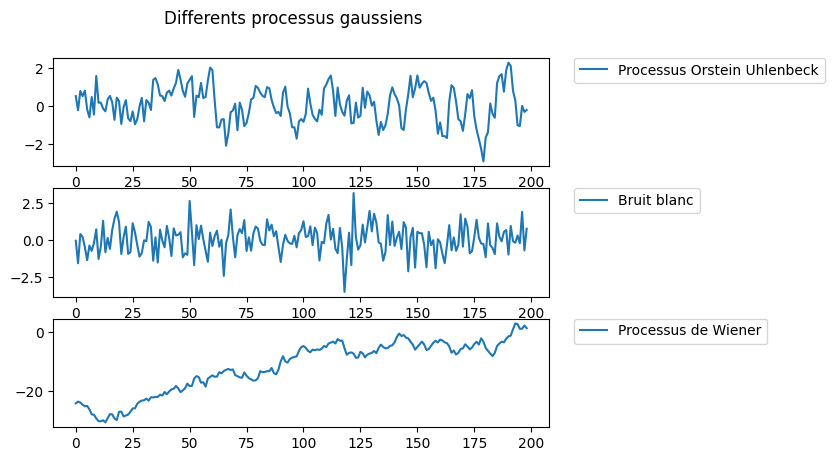

In [49]:
N = 200
T = 1

fig, (ax1, ax2,ax3) = plt.subplots(3, 1)
fig.suptitle('Differents processus gaussiens')

# processus orstein uhlenbeck
Sigma=[[exp(-(abs(i-j))/2) for i in range(N)]for j in range(N)]
mu=[0 for i in range(N)]
L = np.linalg.cholesky(Sigma)
d=len(mu)
Ni = np.random.randn(N,1)
X=np.dot(L.T,Ni)


ax1.plot(X[1:N+1],label="Processus Orstein Uhlenbeck")
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# processus orstein uhlenbeck


Sigma=[[0 for i in range(N)]for j in range(N)]
for i in range(N):
    Sigma[i][i]=1
mu=[0 for i in range(N)]
L = np.linalg.cholesky(Sigma)
d=len(mu)
Ni = np.random.randn(N,1)
X=np.dot(L.T,Ni)


ax2.plot(X[1:N+1],label="Bruit blanc")
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


# processus de Wiener
Sigma=[[min(i+1,j+1) for i in range(N)]for j in range(N)]
mu=[0 for i in range(N)]
L = np.linalg.cholesky(Sigma)
d=len(mu)
Ni = np.random.randn(N,1)
X=np.dot(L.T,Ni)



        
ax3.plot(X[1:N+1],label="Processus de Wiener")
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)



## Exercice 3 (Mouvement brownien comme la limite d'une marche aléatoire)

Soit $X=\{X_n\}_{n\ge 0}$ une marche aléatoire définie par 
$$
X_{n} = X_{n-1}+\xi_{n}, n\ge 1 
$$
avec $X_0=0$. Les v.a. $\xi_n$ sont i.i.d. et suivent une loi de Rademacher donnée par $\mathbb{P}(\xi_n = \pm 1) = 1/2$.

> **Question 1.** Ecrire un script python pour simuler une réalisation de la marche en temps définie précédemment. 

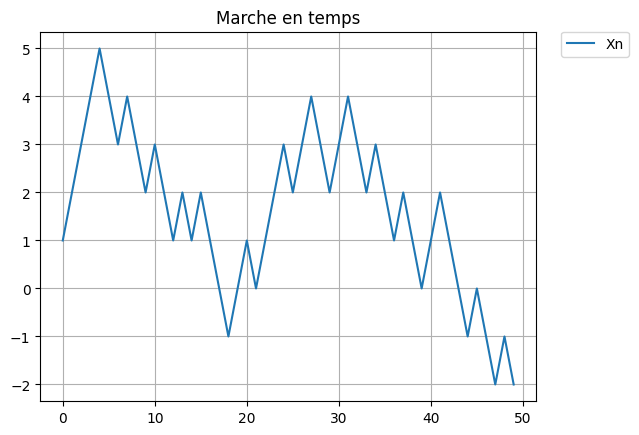

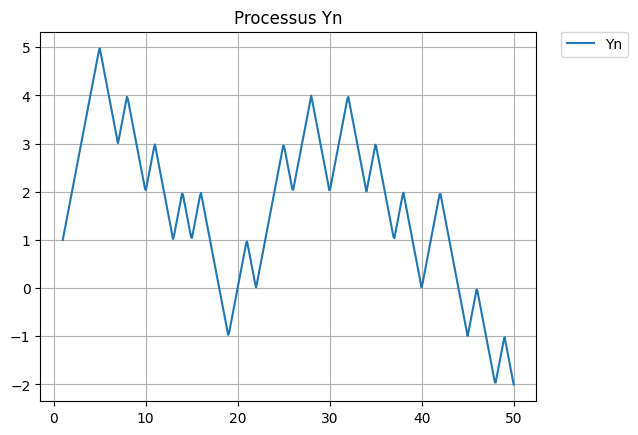

In [53]:
##############################################################################
# MARCHE EN TEMPS Xn
##############################################################################

# rademacher distribution
n  =  50
xi = np.random.choice([-1, 1], size=n)
Xn = np.cumsum(xi)

# trace
plt.figure(1)
plt.grid()
plt.plot(Xn,label="Xn")
plt.title('Marche en temps')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

##############################################################################
# INTERPOLE LINEAIRE YN
##############################################################################

grille temporelle
tps =  

# interpolant 
Yn =  
xi =  
for i in range(0,n):
    ftn   =  
    Yn[i] =  

#trace
plt.figure(2)
plt.grid()
plt.plot(tps,Yn,label="Yn")
plt.title('Processus Yn')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


> **Question 2.**
> - Vérifier que $\mathbb{E}(\xi_n) =0$ et $\mathbb{V}(\xi_n) = 1$ puis en déduire $\mathbb{E}(X_n)=0$ et $\mathrm{cov}(X_n,X_m) = \mathrm{min}(n,m)$. 
> - Justifier que $\frac{1}{n} X_n \to 0$ p.s. quand $n \to \infty$.
> - Montrer que que $\frac{X_n}{\sqrt{n}} \sim \mathcal{N}(0,1)$ quand $n \to \infty$ .


> Compléter le script de la question 1. pour simuler des trajectoires du processus $Y_N$, à $N$ donné. On travaillera sur l'intervalle $[0,1]$.

>**Question 3.** Montrer que $Y_N \sim \mathcal{N}(0,t), t > 0$ pour $N \to \infty$. On traitera séparément les deux cas suivants :
> - $X_{\lfloor tN \rfloor} / \sqrt{N} \sim \mathcal{N}(0,t)$ pour $N\to \infty$; 
> - $(tN - \lfloor tN \rfloor) \xi_{\lfloor tN \rfloor} / \sqrt{N}  \stackrel{\mathbb{P}}{\longrightarrow} 0$ pour $N \to \infty$.